In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

print("✅ Librerías cargadas")

✅ Librerías cargadas


In [2]:
# Cargamos los dos archivos
df_products = pd.read_csv('../01-data/raw/product_info.csv')
df_reviews = pd.read_csv('../01-data/raw/reviews_0-250.csv')

print("PRODUCTOS:")
print(f"Filas: {df_products.shape[0]}, Columnas: {df_products.shape[1]}")
print(df_products.columns.tolist())

print("\nRESEÑAS:")
print(f"Filas: {df_reviews.shape[0]}, Columnas: {df_reviews.shape[1]}")
print(df_reviews.columns.tolist())

PRODUCTOS:
Filas: 8494, Columnas: 27
['product_id', 'product_name', 'brand_id', 'brand_name', 'loves_count', 'rating', 'reviews', 'size', 'variation_type', 'variation_value', 'variation_desc', 'ingredients', 'price_usd', 'value_price_usd', 'sale_price_usd', 'limited_edition', 'new', 'online_only', 'out_of_stock', 'sephora_exclusive', 'highlights', 'primary_category', 'secondary_category', 'tertiary_category', 'child_count', 'child_max_price', 'child_min_price']

RESEÑAS:
Filas: 602130, Columnas: 19
['Unnamed: 0', 'author_id', 'rating', 'is_recommended', 'helpfulness', 'total_feedback_count', 'total_neg_feedback_count', 'total_pos_feedback_count', 'submission_time', 'review_text', 'review_title', 'skin_tone', 'eye_color', 'skin_type', 'hair_color', 'product_id', 'product_name', 'brand_name', 'price_usd']


In [3]:
# Unimos por product_id
df = pd.merge(df_reviews, df_products, on='product_id', how='left')

print(f"Dataset combinado: {df.shape[0]} filas, {df.shape[1]} columnas")
df.head()

Dataset combinado: 602130 filas, 45 columnas


,Unnamed: 0,author_id,rating_x,is_recommended,helpfulness,total_feedback_count,total_neg_feedback_count,total_pos_feedback_count,submission_time,review_text,...,online_only,out_of_stock,sephora_exclusive,highlights,primary_category,secondary_category,tertiary_category,child_count,child_max_price,child_min_price
0,0,1741593524,5,1.0,1.0,2,0,2,2023-02-01,I use this with the Nudestix “Citrus Clean Bal...,...,1,0,0,['Clean at Sephora'],Skincare,Cleansers,NaN,0,NaN,NaN
1,1,31423088263,1,0.0,NaN,0,0,0,2023-03-21,I bought this lip mask after reading the revie...,...,0,0,1,"['allure 2019 Best of Beauty Award Winner', 'C...",Skincare,Lip Balms & Treatments,NaN,3,24.0,24.0
2,2,5061282401,5,1.0,NaN,0,0,0,2023-03-21,My review title says it all! I get so excited ...,...,0,0,1,"['allure 2019 Best of Beauty Award Winner', 'C...",Skincare,Lip Balms & Treatments,NaN,3,24.0,24.0
3,3,6083038851,5,1.0,NaN,0,0,0,2023-03-20,I’ve always loved this formula for a long time...,...,0,0,1,"['allure 2019 Best of Beauty Award Winner', 'C...",Skincare,Lip Balms & Treatments,NaN,3,24.0,24.0
4,4,47056667835,5,1.0,NaN,0,0,0,2023-03-20,"If you have dry cracked lips, this is a must h...",...,0,0,1,"['allure 2019 Best of Beauty Award Winner', 'C...",Skincare,Lip Balms & Treatments,NaN,3,24.0,24.0


In [5]:
print(df.columns.tolist())

['Unnamed: 0', 'author_id', 'rating_x', 'is_recommended', 'helpfulness', 'total_feedback_count', 'total_neg_feedback_count', 'total_pos_feedback_count', 'submission_time', 'review_text', 'review_title', 'skin_tone', 'eye_color', 'skin_type', 'hair_color', 'product_id', 'product_name_x', 'brand_name_x', 'price_usd_x', 'product_name_y', 'brand_id', 'brand_name_y', 'loves_count', 'rating_y', 'reviews', 'size', 'variation_type', 'variation_value', 'variation_desc', 'ingredients', 'price_usd_y', 'value_price_usd', 'sale_price_usd', 'limited_edition', 'new', 'online_only', 'out_of_stock', 'sephora_exclusive', 'highlights', 'primary_category', 'secondary_category', 'tertiary_category', 'child_count', 'child_max_price', 'child_min_price']


In [6]:
# Eliminamos filas sin texto de reseña ni rating
df = df.dropna(subset=['review_text', 'rating_x'])
df = df.reset_index(drop=True)

print(f"Dataset limpio: {df.shape[0]} filas")

Dataset limpio: 601131 filas


In [7]:
def clasificar_sentimiento(rating):
    if rating >= 4:
        return 'Positivo'
    elif rating == 3:
        return 'Neutro'
    else:
        return 'Negativo'

df['sentimiento'] = df['rating_x'].apply(clasificar_sentimiento)

print(df['sentimiento'].value_counts())

sentimiento
Positivo    495103
Negativo     62050
Neutro       43978
Name: count, dtype: int64


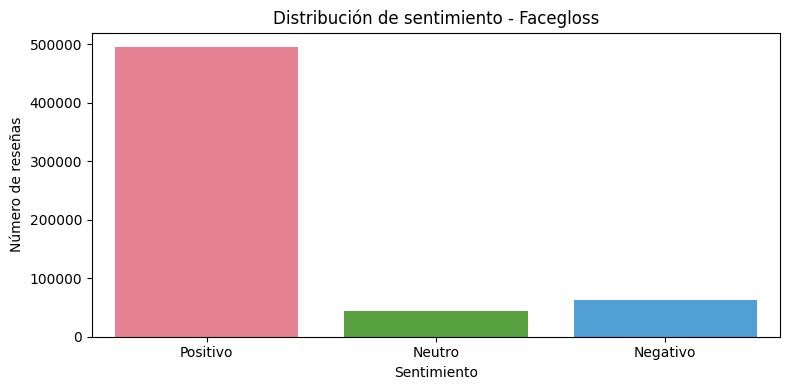

In [9]:
plt.figure(figsize=(8,4))
sns.countplot(x='sentimiento', data=df, palette='husl', order=['Positivo','Neutro','Negativo'])
plt.title('Distribución de sentimiento - Facegloss')
plt.xlabel('Sentimiento')
plt.ylabel('Número de reseñas')
plt.tight_layout()
plt.savefig('../04-reports/graphs/distribucion_sentimiento.png')
plt.show()

In [10]:
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

stop_words = set(stopwords.words('english'))

def limpiar_texto(texto):
    texto = str(texto).lower()
    texto = re.sub(r'[^a-z\s]', '', texto)
    texto = re.sub(r'\s+', ' ', texto).strip()
    palabras = [p for p in texto.split() if p not in stop_words]
    return ' '.join(palabras)

df['texto_limpio'] = df['review_text'].apply(limpiar_texto)

print("Original:", df['review_text'].iloc[0])
print("\nLimpio:", df['texto_limpio'].iloc[0])

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\berna\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Original: I use this with the Nudestix “Citrus Clean Balm & Make-Up Melt“ to double cleanse and it has completely changed my skin (for the better). The make-up melt is oil based and removes all of your makeup super easily. I follow-up with this water based cleanser, and I also use this just by itself when I’m not wearing make-up. It leaves the skin gently cleansed, but without stripping the skin. 10/10 recommend combining with the make-up melt. It’s perfection!

Limpio: use nudestix citrus clean balm makeup melt double cleanse completely changed skin better makeup melt oil based removes makeup super easily followup water based cleanser also use im wearing makeup leaves skin gently cleansed without stripping skin recommend combining makeup melt perfection


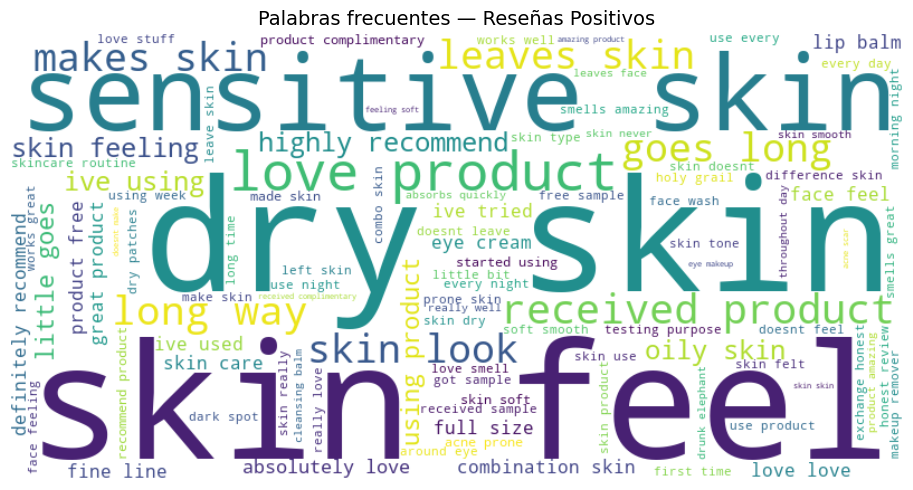

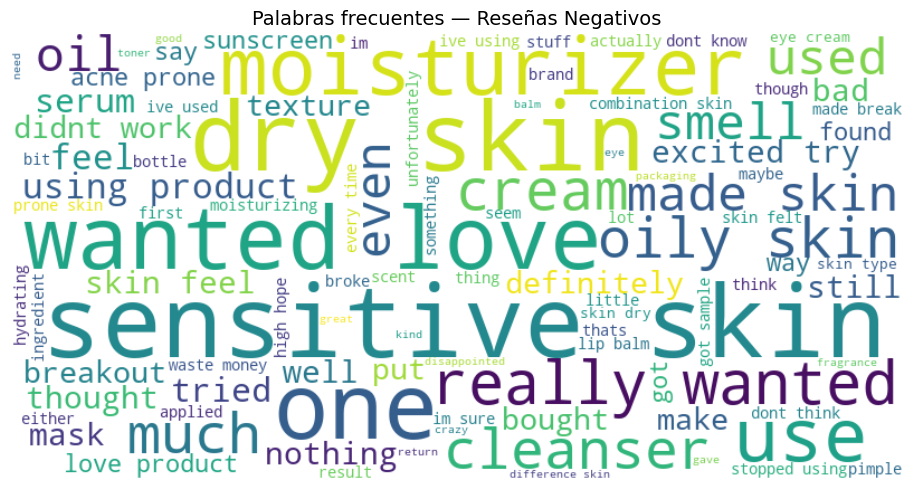

In [11]:
from wordcloud import WordCloud

for sentimiento in ['Positivo', 'Negativo']:
    textos = df[df['sentimiento'] == sentimiento]['texto_limpio']
    texto_unido = ' '.join(textos.dropna())
    
    wc = WordCloud(width=800, height=400, background_color='white', max_words=100).generate(texto_unido)
    
    plt.figure(figsize=(10,5))
    plt.imshow(wc, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Palabras frecuentes — Reseñas {sentimiento}s', fontsize=14)
    plt.tight_layout()
    plt.savefig(f'../04-reports/graphs/wordcloud_{sentimiento.lower()}.png')
    plt.show()

In [12]:
top_productos = df.groupby('product_name_x')['rating_x'].agg(['mean','count']).reset_index()
top_productos.columns = ['producto', 'rating_medio', 'num_reseñas']

# Filtramos productos con al menos 10 reseñas para que sea representativo
top_productos = top_productos[top_productos['num_reseñas'] >= 10]

print("🏆 TOP 10 MEJOR VALORADOS:")
print(top_productos.sort_values('rating_medio', ascending=False).head(10))

print("\n⚠️ TOP 10 PEOR VALORADOS:")
print(top_productos.sort_values('rating_medio').head(10))

🏆 TOP 10 MEJOR VALORADOS:
                                              producto  rating_medio  \
32   Black Tea Anti-Aging Moisturizer with Retinol-...      4.843772   
72                                       Facial Cotton      4.828014   
207  Tea Elixir Niacinamide & Hyaluronic Acid Anti-...      4.772436   
59                       Daily Microfoliant Exfoliator      4.695803   
128                 Mini Daily Microfoliant Exfoliator      4.695803   
105                    Intense Therapy Lip Balm SPF 25      4.681692   
50                       Clear Sunscreen Stick SPF 50+      4.656638   
178                                      Rosebud Salve      4.645633   
210  The Dewy Serum Resurfacing and Plumping Treatment      4.635514   
2              5 Stars Retinol + Niacinamide Eye Serum      4.635096   

     num_reseñas  
32          1389  
72          2820  
207         1872  
59          4599  
128         4599  
105         3594  
50          1529  
178         5198  
210       

In [13]:
df.to_csv('../01-data/processed/dataset_limpio.csv', index=False)
print("✅ Dataset guardado correctamente")

✅ Dataset guardado correctamente


In [14]:
from sklearn.model_selection import train_test_split

# Usamos solo positivo y negativo (eliminamos neutros por ahora)
df_modelo = df[df['sentimiento'] != 'Neutro'].copy()

# X son los textos, y son las etiquetas
X = df_modelo['texto_limpio']
y = df_modelo['sentimiento']

# Dividimos en entrenamiento (80%) y test (20%)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"Entrenamiento: {len(X_train)} reseñas")
print(f"Test: {len(X_test)} reseñas")

Entrenamiento: 445722 reseñas
Test: 111431 reseñas


In [15]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Convertimos texto en números
vectorizer = TfidfVectorizer(max_features=5000, ngram_range=(1,2))
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

print(f"Dimensiones del vector de entrenamiento: {X_train_vec.shape}")

Dimensiones del vector de entrenamiento: (445722, 5000)


In [16]:
from sklearn.linear_model import LogisticRegression

modelo = LogisticRegression(max_iter=1000, random_state=42)
modelo.fit(X_train_vec, y_train)

print("✅ Modelo entrenado correctamente")

✅ Modelo entrenado correctamente


In [17]:
from sklearn.metrics import classification_report, confusion_matrix

y_pred = modelo.predict(X_test_vec)

print("=== RESULTADOS DEL MODELO ===\n")
print(classification_report(y_test, y_pred))

=== RESULTADOS DEL MODELO ===

              precision    recall  f1-score   support

    Negativo       0.89      0.75      0.81     12410
    Positivo       0.97      0.99      0.98     99021

    accuracy                           0.96    111431
   macro avg       0.93      0.87      0.89    111431
weighted avg       0.96      0.96      0.96    111431



In [18]:
def predecir_sentimiento(texto):
    texto_limpio = limpiar_texto(texto)
    vector = vectorizer.transform([texto_limpio])
    prediccion = modelo.predict(vector)[0]
    probabilidad = modelo.predict_proba(vector).max()
    return f"Sentimiento: {prediccion} (confianza: {probabilidad:.1%})"

# Pruebas con reseñas inventadas de skincare
print(predecir_sentimiento("This moisturizer is absolutely amazing, my skin feels so soft"))
print(predecir_sentimiento("Terrible product, broke me out and smells awful"))
print(predecir_sentimiento("It's okay, nothing special but does the job"))

Sentimiento: Positivo (confianza: 100.0%)
Sentimiento: Negativo (confianza: 100.0%)
Sentimiento: Negativo (confianza: 89.8%)


In [19]:
import joblib

# Guardamos el modelo y el vectorizador
joblib.dump(modelo, '../01-data/exports/modelo_sentimiento.pkl')
joblib.dump(vectorizer, '../01-data/exports/vectorizador.pkl')

print("✅ Modelo guardado correctamente")

✅ Modelo guardado correctamente
